# Comparative Evaluation of Machine Learning Algorithms with Deep Learning Models and Hybrid Models for Stock Market Predictions
#### Karthik Narayanan
#### MSc Business Analytics
#### University of Exeter

---

### Required Dependencies

Please ensure the following Python libraries are installed on your local machine.

### These are the required dependencies:

- **pandas**
- **numpy**
- **yfinance**
- **matplotlib**
- **seaborn**
- **scipy**
- **scikit-learn**
- **tensorflow**
- **xgboost**

---

### Installation

To install these dependencies, please run the following command in your terminal:

In [ ]:
pip install pandas numpy yfinance matplotlib seaborn scipy scikit-learn tensorflow xgboost warnings

---

### Introduction

This study does not rely on a pre-existing physical dataset. Instead, stock market data is sourced directly from Yahoo Finance's servers using the `yfinance` Python library. This approach offers several advantages:

- **Real-time Data:** By fetching data directly from Yahoo Finance, the analysis can potentially use the most up-to-date information available.
- **Flexibility:** The code allows for easy modification of the stock ticker symbol, start date, and end date, enabling analysis of different stocks or time periods without needing to manually download new datasets.
- **Reproducibility:** Other researchers can easily replicate the study by running the same code, which will fetch the same historical data.
- **Efficient Storage:** This method eliminates the need to store large datasets locally, as the required data is fetched on-demand when the code is executed.


---

### Data Collection

### Stock Data Fetching Function

The function `fetch_stock_data` is designed to retrieve historical stock data for a specified ticker symbol over a given date range. It leverages the `yfinance` library, which provides an easy interface to download financial data directly from Yahoo Finance.

```python
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

### Function Implementation 

The function `fetch_stock_data` is used to retrieve historical stock data from January 1, 2020, to December 31, 2023 for `Apple Inc. (AAPL)`. It leverages the `yfinance` library, which provides an easy interface to download financial data directly from Yahoo Finance.
To fetch data for Apple Inc. (AAPL) between January 1, 2020, and December 31, 2023, you can use the following command: 

```python
data = fetch_stock_data('AAPL', '2020-01-01', '2023-12-31')

---

### Importing Necessary Libraries

The following libraries are imported to handle various tasks:

- **Data manipulation and analysis**: `pandas`, `numpy`
- **Financial data retrieval**: `yfinance`
- **Data visualization**: `matplotlib`, `seaborn`
- **Statistical analysis**: `scipy`
- **Machine learning model development and evaluation**: `sklearn`
- **Deep learning model creation**: `tensorflow`
- **Advanced machine learning techniques**: `xgboost`


In [4]:
######## IMPORT STATEMENTS ########
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
import xgboost as xgb
import warnings

---

### Data Sourcing and Preprocessing

#### Data Sourcing
The `fetch_stock_data` function retrieves historical stock data for a given ticker symbol using the `yfinance` library. In this example, the function is used to fetch data for **Apple Inc. (AAPL)** from **January 1, 2020** to **December 31, 2023**.


In [5]:
######## DATA SOURCING ########
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data
data = fetch_stock_data('AAPL', '2020-01-01', '2023-12-31')

[*********************100%%**********************]  1 of 1 completed


#### Data Preprocessing
- **Return Calculation**: The daily return is calculated based on the adjusted closing price (`Adj Close`) and stored in a new column `Return`.
- **Missing Values Removal**: Any missing values resulting from the return calculation are removed.
- **Percentage Change Calculation**: The daily percentage change in the closing price (`Close`) is computed and stored in a new column `% Change`.
- **Index Resetting**: The DataFrame index is reset to ensure sequential ordering after the data preprocessing steps.

In [6]:
######## DATA PREPROCESSING ########
data['Return'] = data['Adj Close'].pct_change()
data.dropna(inplace=True)
data['% Change'] = data['Close'].pct_change() * 100
data.reset_index(inplace=True)

---

### Exploratory Data Analysis (EDA)

This section provides an in-depth analysis of the historical stock data for Apple Inc. (AAPL) from January 1, 2020, to December 31, 2023.

#### Summary Statistics
The summary statistics give a quick overview of the Count, Mean, Standard Deviation, Minimum value, Maximum value, 1st Quartile, Median and 3rd Quartile.

In [7]:
#Summary Statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
              Open         High          Low        Close    Adj Close  \
count  1005.000000  1005.000000  1005.000000  1005.000000  1005.000000   
mean    140.741791   142.388227   139.208557   140.873525   138.929886   
std      33.260157    33.379900    33.131532    33.265781    33.528993   
min      57.020000    57.125000    53.152500    56.092499    54.569733   
25%     123.750000   125.180000   122.209999   123.750000   121.323563   
50%     145.550003   147.300003   144.130005   145.860001   143.763596   
75%     166.369995   168.160004   164.910004   166.229996   164.267776   
max     198.020004   199.619995   197.000000   198.110001   197.361084   

             Volume       Return     % Change  
count  1.005000e+03  1005.000000  1004.000000  
mean   9.891576e+07     0.001187     0.117143  
std    5.441139e+07     0.021146     2.115511  
min    2.404830e+07    -0.128647   -12.864696  
25%    6.406230e+07    -0.009127    -0.910941  
50%    8.456650e+07     

#### Correlation Matrix

A correlation matrix is a table that shows the correlation coefficients between multiple variables. Each cell in the matrix represents the correlation between two variables, which can range from -1 to 1. A value closer to 1 indicates a strong positive correlation, a value closer to -1 indicates a strong negative correlation, and a value around 0 indicates little to no linear relationship.


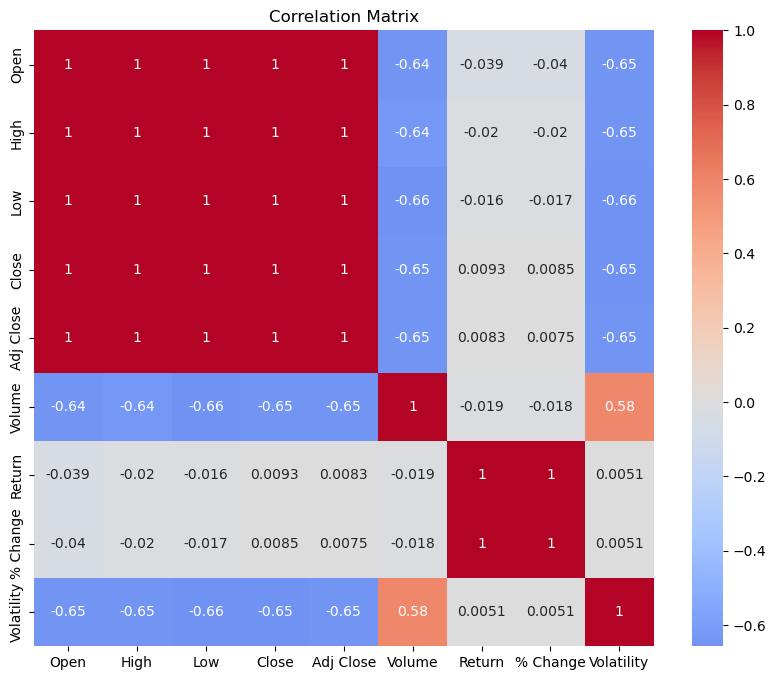

In [32]:
#Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()
warnings.filterwarnings('ignore')

#### Time Series Plot for Closing Price
The time series plot illustrates the closing price of AAPL stock from January 1, 2020, to December 31, 2023. The plot shows the daily closing price data. Time is plotted on the x-axis and the closing price on the y-axis. This visualization allows us to observe the overall trend, seasonal patterns, and any notable fluctuations in the stock's price over the specified period.

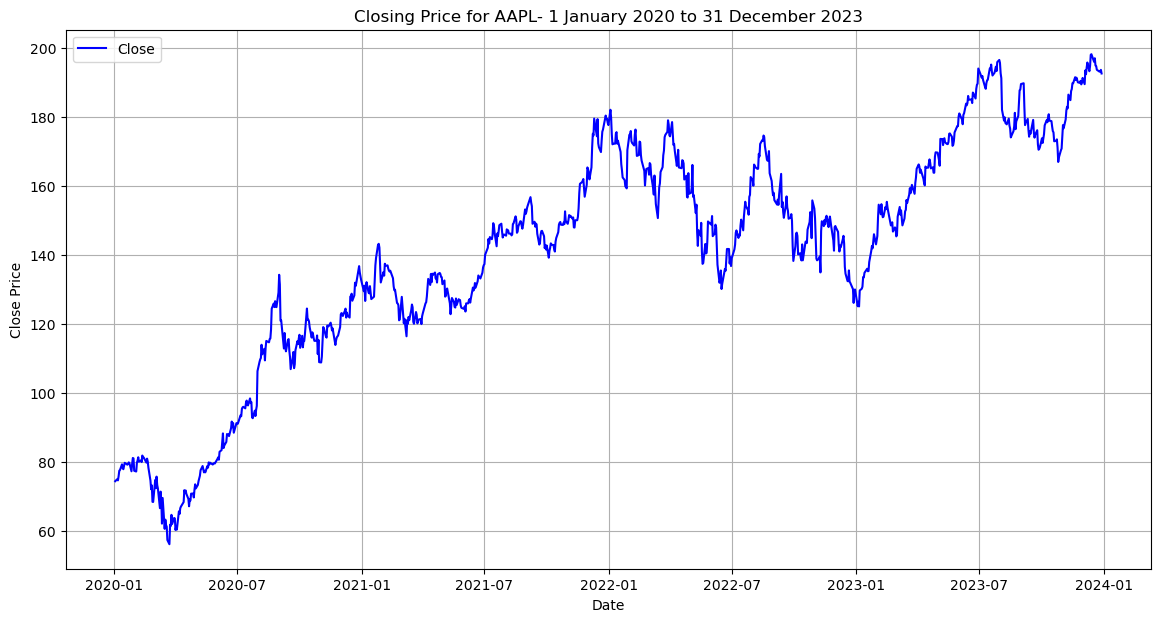

In [9]:
#Time Series Plot for Closing Price
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close', color='blue')
plt.title('Closing Price for AAPL- 1 January 2020 to 31 December 2023')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


#### Rolling Statistics for Moving Averages
The plot shows the closing price along with two moving averages: the 30-day and 100-day moving averages. The 30-day moving average (in red) provides a shorter-term trend, while the 100-day moving average (in green) highlights a longer-term trend. By overlaying these moving averages on the closing price, we can better understand the smoothing effect and identify significant trends and turning points in the data.

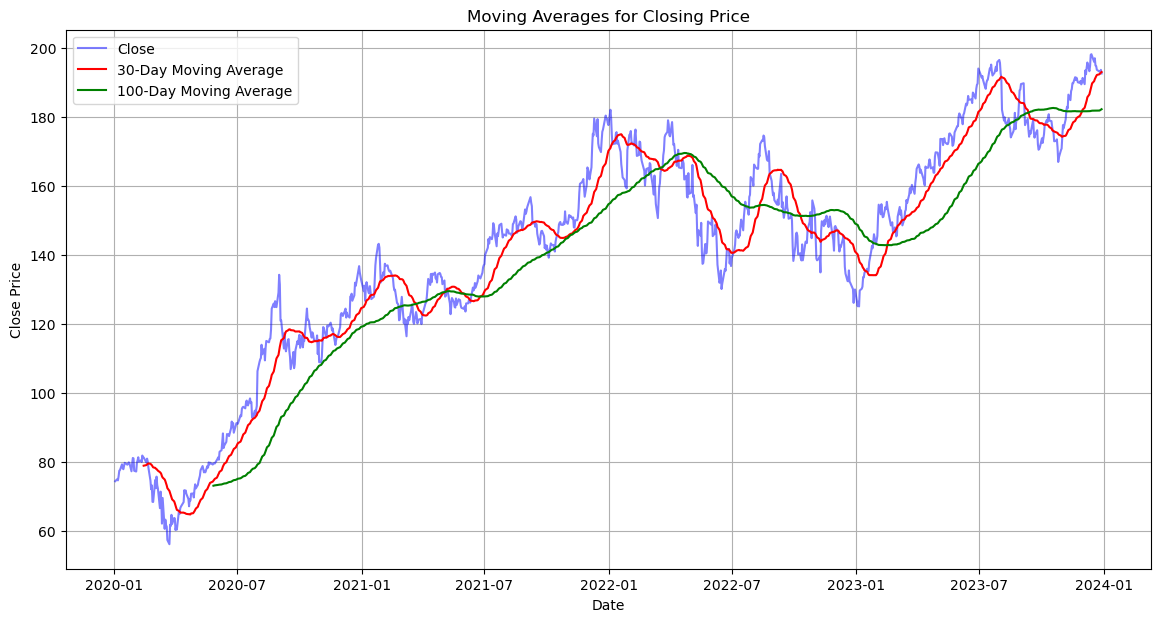

In [10]:
#Rolling Statistics for Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close', color='blue', alpha=0.5)
plt.plot(data['Date'], data['Close'].rolling(window=30).mean(), label='30-Day Moving Average', color='red')
plt.plot(data['Date'], data['Close'].rolling(window=100).mean(), label='100-Day Moving Average', color='green')
plt.title('Moving Averages for Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

#### Volatility Plot
This plot depicts the 30-day rolling volatility of AAPL stock returns. Volatility, calculated as the standard deviation of returns over a 30-day window, measures the degree of variation in the stock's returns. The plot helps us understand periods of high and low volatility, which can be crucial for assessing market risk and making investment decisions.

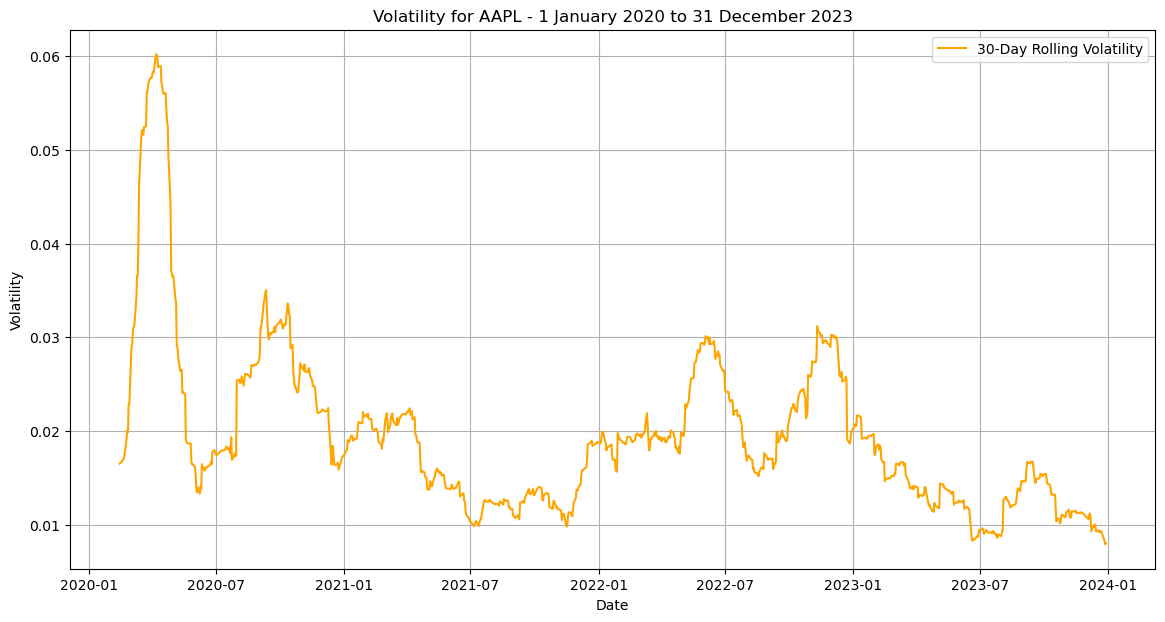

In [11]:
#Volatility Plot
data['Volatility'] = data['Return'].rolling(window=30).std()
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volatility'], label='30-Day Rolling Volatility', color='orange')
plt.title('Volatility for AAPL - 1 January 2020 to 31 December 2023')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

#### Autocorrelation Plot
The autocorrelation plot helps in identifying the presence of any patterns or trends in the stock returns over time. It shows how the stock returns are related to their past values. In simpler terms, it helps us see if today's returns are influenced by returns from previous days.

If the plot shows high correlations at certain lags (e.g., a return today is similar to a return 10 days ago), it means there might be repeating patterns or trends in the returns. This information can be useful for predicting future returns and understanding how past returns might affect future ones.

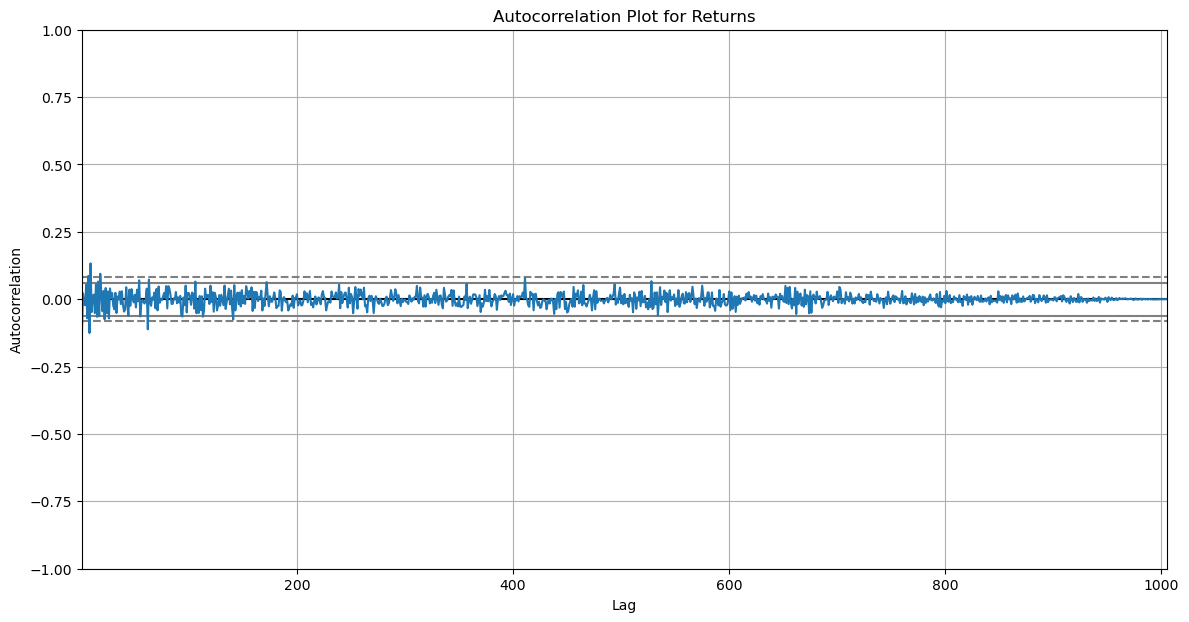

In [12]:
#Autocorrelation Plot
plt.figure(figsize=(14, 7))
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Return'])
plt.title('Autocorrelation Plot for Returns')
plt.show()

---

### Target Variable and Feature Selection

In this section, we define the target variable and select the relevant features for modeling.

- **Features (X)**: The features selected for modeling are `Open`, `High`, `Low`, `Close`, and `Volume`. These features are fundamental indicators of stock price movement and trading activity, providing a comprehensive view of the market conditions. `Open`, `High`, `Low`, and `Close` prices capture the daily price range and trends, while `Volume` reflects the trading activity and liquidity, which can influence price changes. Therefore, these were selected as features to predict the target variable.

- **Target Variable (y)**: The target variable is `Return`, representing the daily returns calculated from the stock prices. Returns are a crucial metric in financial modeling as they provide insight into the stock’s performance and volatility. This value is essential for evaluating stock performance and making informed trading decisions. Therefore, `Return` was the most optimal target variable for our scenario.


In [13]:
######## TAERGET VARIABLE AND FEATURE SELECTION ########
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['Return']

---

### Splitting Training and Test Datasets

The dataset is split into training and testing sets:

- **Training Set**: 80% of the data is used for training the model.
- **Test Set**: 20% of the data is reserved for testing the model's performance.
- The `train_test_split` function is used with a `random_state` of 42 to ensure reproducibility.

### Normalization

Normalization is applied to the feature data to standardize the scale of the input variables:

- **Scaler**: The `StandardScaler` is used to transform the feature data.
- **Training Data**: The scaler is fitted to the training data and then applied to transform it.
- **Test Data**: The same scaler is used to transform the test data to ensure consistency.


In [14]:
# Ignore all warnings
warnings.filterwarnings("ignore")

######## SPLITTING TRAINING AND TEST DATASETS ########
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

######## NORMALIZATION ########
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


---

### Visualizing Training vs Testing Data

A plot is created to visually compare the training and testing data:

- **Blue Line**: Represents the `Return` values in the training dataset.
- **Red Line**: Represents the `Return` values in the testing dataset.
- This visualization helps in understanding the distribution and segmentation of data between training and testing sets.


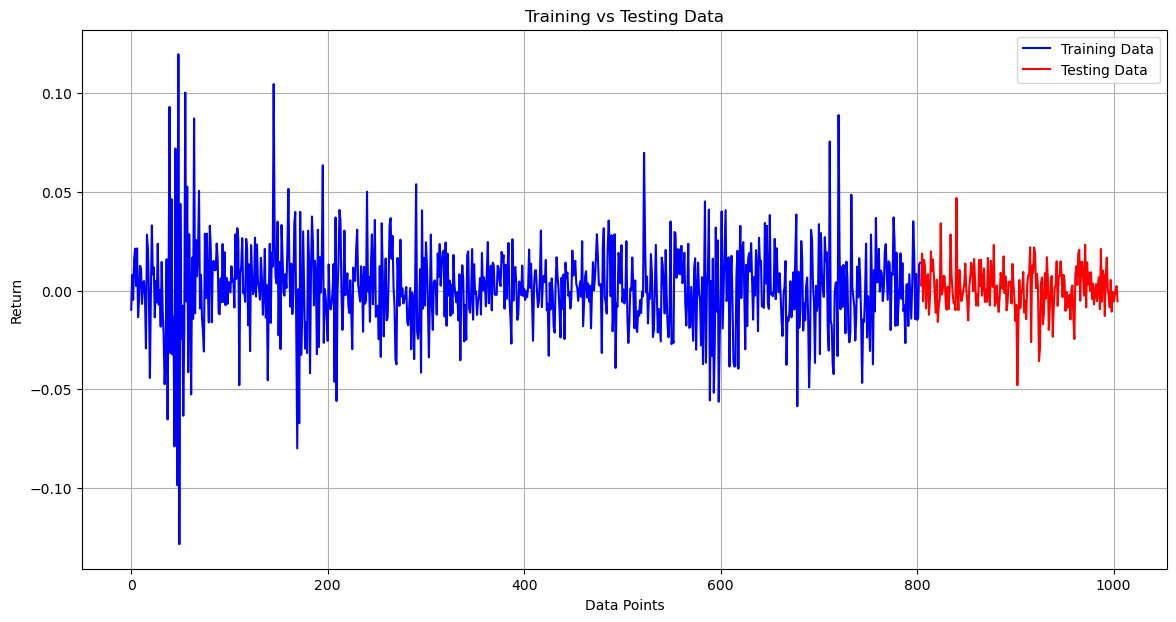

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[:len(X_train)], y[:len(X_train)], label='Training Data', color='blue')
plt.plot(data.index[len(X_train):], y[len(X_train):], label='Testing Data', color='red')
plt.title('Training vs Testing Data')
plt.xlabel('Data Points')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

---

### Function for Model Evaluation

A custom function `evaluate_model` is defined to assess the performance of regression models. This function calculates several key evaluation metrics:

- **Mean Squared Error (MSE)**: Measures the average of the squares of the errors between actual and predicted values.
- **Root Mean Squared Error (RMSE)**: The square root of MSE, providing error in the same units as the target variable.
- **Mean Absolute Error (MAE)**: The average absolute difference between actual and predicted values.
- **R-squared (R²)**: Indicates the proportion of the variance in the target variable that is predictable from the features.
- **Explained Variance Score (EVS)**: Measures how well the model accounts for the variance in the target data.

The function returns these metrics, providing a comprehensive evaluation of the model's performance.


In [16]:
######## FUNCTION FOR EVALUATION ########
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    return mse, rmse, mae, r2, evs

---

### Function for Plot Generation

A custom function `plot_results` is defined to visualize the comparison between true and predicted returns from a regression model. This function creates a scatter plot and includes important evaluation metrics in the title:

- **True Returns**: Represented by blue circles (`o`), these are the actual returns from the dataset.
- **Predicted Returns**: Represented by red crosses (`x`), these are the returns predicted by the model.
- **Plot Title**: Includes the model name, a custom title, and key evaluation metrics:
  - **MSE**: Mean Squared Error
  - **RMSE**: Root Mean Squared Error
  - **MAE**: Mean Absolute Error
  - **R²**: R-squared value
  - **EVS**: Explained Variance Score
- **Axes**: 
  - **X-axis**: Represents the date or index of the data points.
  - **Y-axis**: Represents the return values.
  
This function helps in visually assessing the model's performance by comparing true and predicted values.

In [17]:
######## FUNCTION FOR PLOT GENERATION ########
def plot_results(model_name, y_true, y_pred, title, mse, rmse, mae, r2, evs):
    plt.figure(figsize=(12, 6))
    plt.scatter(y_true.index, y_true, label='True Returns', color='blue', marker='o', s=20)
    plt.scatter(y_true.index, y_pred, label='Predicted Returns', color='red', marker='x', s=20)
    plt.title(f'{title} - True vs Predicted Returns\nMSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}, EVS: {evs:.4f}')
    plt.xlabel('Data Points')
    plt.ylabel('Return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

---

### Machine Learning Models

This section involves training several machine learning models to predict stock returns and evaluating their performance using various metrics.

#### Linear Regression

Linear regression is a fundamental machine learning technique used to model the relationship between a dependent variable and one or more independent variables. In this case, it predicts stock returns based on features such as the opening, high, low, closing prices, and volume. The model is evaluated using metrics including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared (R²), and Explained Variance Score (EVS). The results are visualized using a scatter plot that compares the true returns with the predicted returns.



Linear Regression - MSE: 0.0002, RMSE: 0.0141, MAE: 0.0089, R^2: 0.5764, EVS: 0.5764


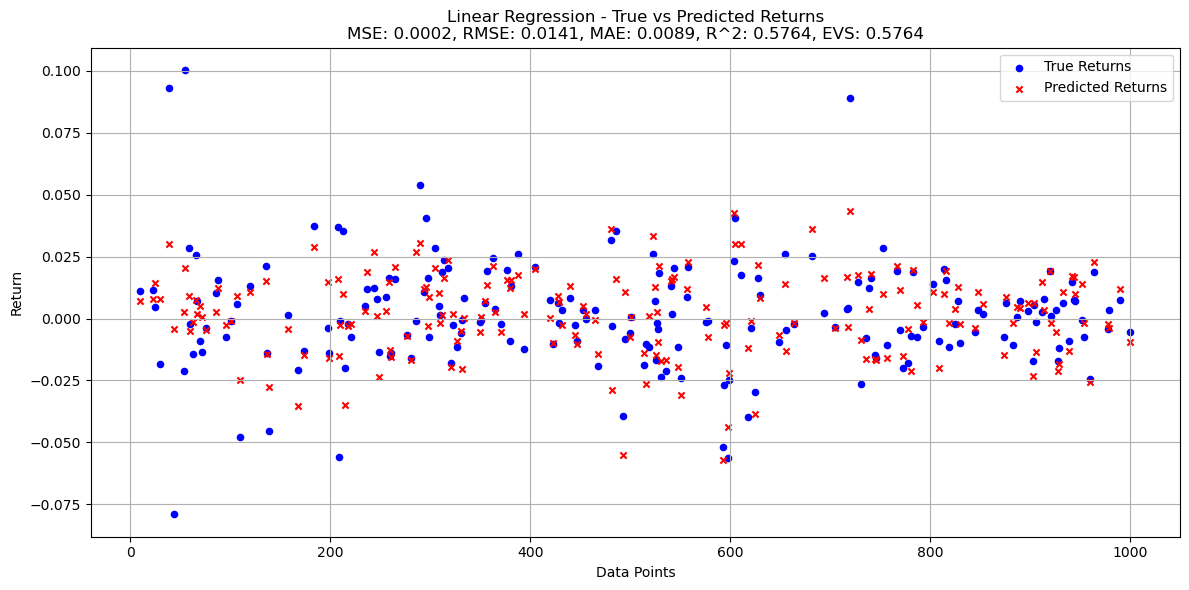

In [18]:
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
lr_mse, lr_rmse, lr_mae, lr_r2, lr_evs = evaluate_model(y_test, y_pred_lr)
print(f'Linear Regression - MSE: {lr_mse:.4f}, RMSE: {lr_rmse:.4f}, MAE: {lr_mae:.4f}, R^2: {lr_r2:.4f}, EVS: {lr_evs:.4f}')
plot_results('Linear Regression', y_test, y_pred_lr, 'Linear Regression', lr_mse, lr_rmse, lr_mae, lr_r2, lr_evs)

#### Decision Tree Regressor

The Decision Tree Regressor models the data using a tree-like structure of decisions. Each node in the tree represents a feature, each branch represents a decision rule, and each leaf node represents an outcome. This method can capture non-linear relationships and interactions between features. The model's performance is assessed using MSE, RMSE, MAE, R², and EVS. The results are visualized to show how well the decision tree predicts stock returns compared to actual values.



Decision Tree - MSE: 0.0008, RMSE: 0.0292, MAE: 0.0190, R^2: -0.8109, EVS: -0.8014


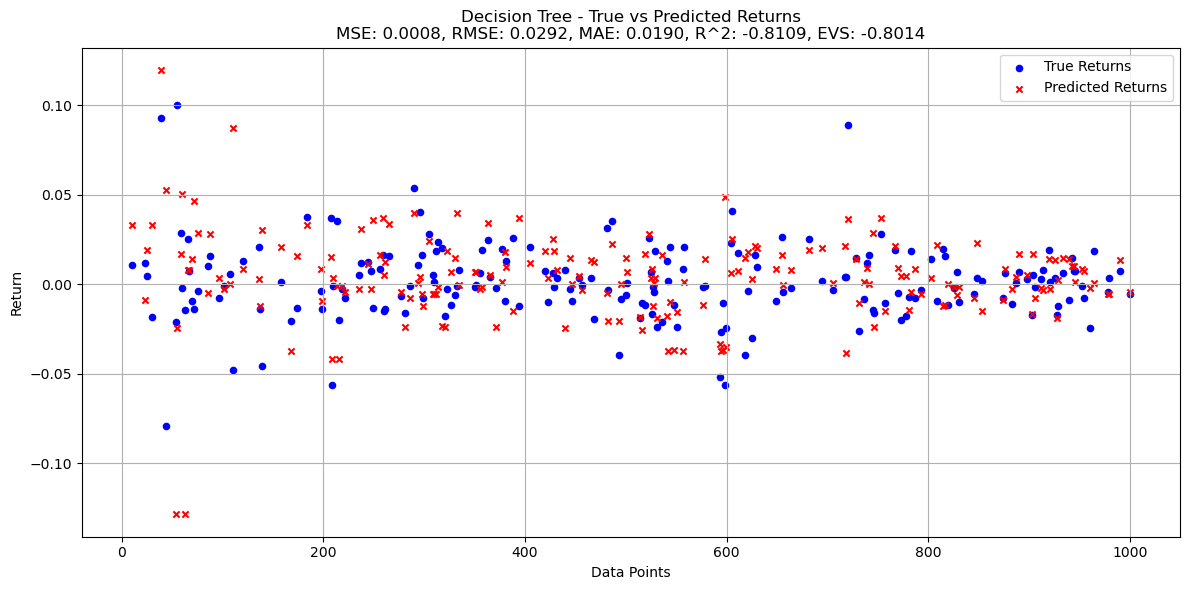

In [19]:
#Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_mse, dt_rmse, dt_mae, dt_r2, dt_evs = evaluate_model(y_test, y_pred_dt)
print(f'Decision Tree - MSE: {dt_mse:.4f}, RMSE: {dt_rmse:.4f}, MAE: {dt_mae:.4f}, R^2: {dt_r2:.4f}, EVS: {dt_evs:.4f}')
plot_results('Decision Tree', y_test, y_pred_dt, 'Decision Tree', dt_mse, dt_rmse, dt_mae, dt_r2, dt_evs)

#### Random Forest Regressor

Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and control overfitting. Each tree in the forest makes an independent prediction, and the final prediction is the average of all trees' predictions. This technique enhances the model's robustness and accuracy. Evaluation metrics include MSE, RMSE, MAE, R², and EVS. Visualization helps to compare the true returns against predictions from the Random Forest model.



Random Forest - MSE: 0.0004, RMSE: 0.0197, MAE: 0.0129, R^2: 0.1735, EVS: 0.1740


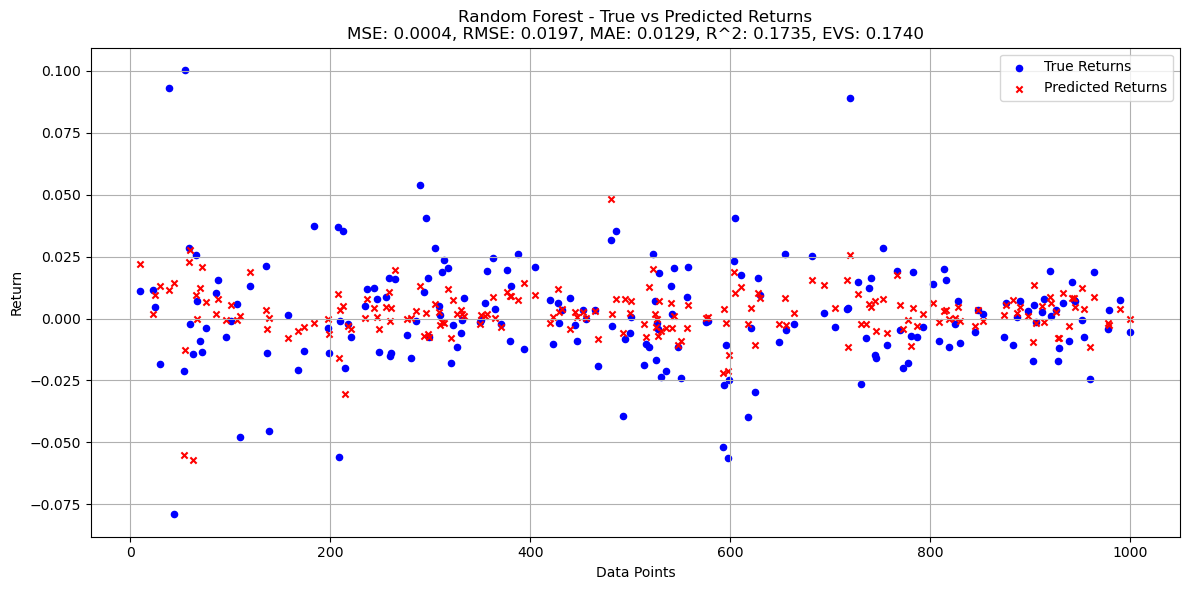

In [20]:
#Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_mse, rf_rmse, rf_mae, rf_r2, rf_evs = evaluate_model(y_test, y_pred_rf)
print(f'Random Forest - MSE: {rf_mse:.4f}, RMSE: {rf_rmse:.4f}, MAE: {rf_mae:.4f}, R^2: {rf_r2:.4f}, EVS: {rf_evs:.4f}')
plot_results('Random Forest', y_test, y_pred_rf, 'Random Forest', rf_mse, rf_rmse, rf_mae, rf_r2, rf_evs)

#### Support Vector Regressor (SVR)

Support Vector Regression (SVR) is a type of Support Vector Machine (SVM) used for regression tasks. It aims to find a function that deviates from the actual observed values by a value no greater than a specified margin. The SVR model uses the radial basis function (RBF) kernel to handle non-linear relationships. Performance is evaluated with MSE, RMSE, MAE, R², and EVS, and results are presented using a scatter plot to compare true and predicted returns.



SVR - MSE: 0.0008, RMSE: 0.0274, MAE: 0.0210, R^2: -0.6015, EVS: -0.3423


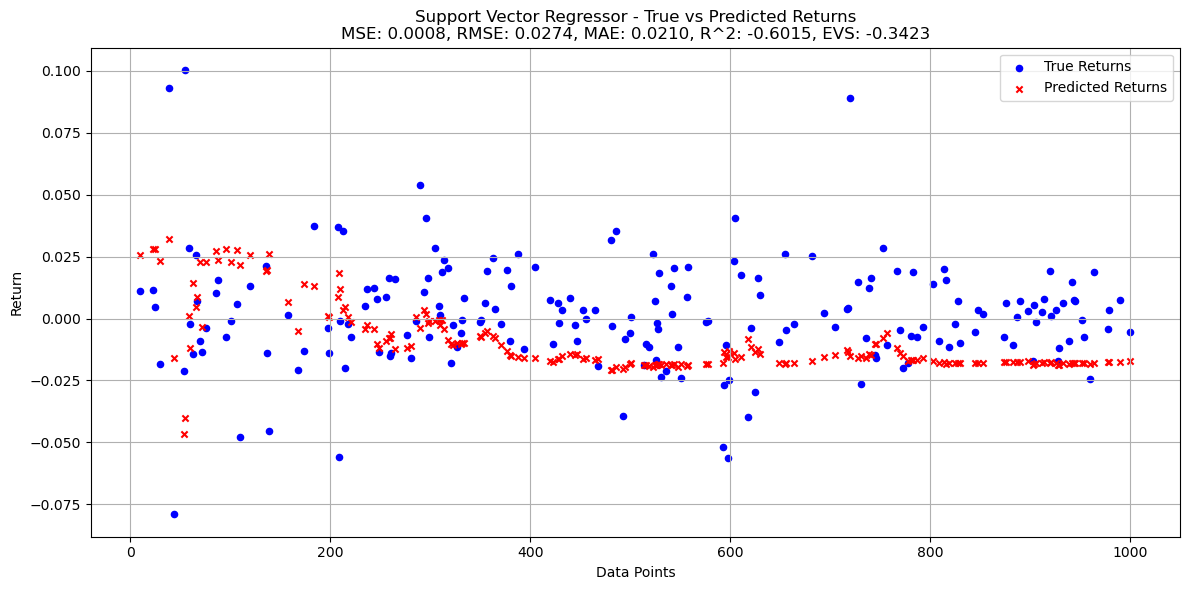

In [21]:
#Support Vector Regressor
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
svr_mse, svr_rmse, svr_mae, svr_r2, svr_evs = evaluate_model(y_test, y_pred_svr)
print(f'SVR - MSE: {svr_mse:.4f}, RMSE: {svr_rmse:.4f}, MAE: {svr_mae:.4f}, R^2: {svr_r2:.4f}, EVS: {svr_evs:.4f}')
plot_results('SVR', y_test, y_pred_svr, 'Support Vector Regressor', svr_mse, svr_rmse, svr_mae, svr_r2, svr_evs)

#### Gradient Boosting Regressor

Gradient Boosting Regressor is an ensemble technique that builds models sequentially, where each new model attempts to correct errors made by the previous ones. It combines weak learners (usually decision trees) to form a strong predictive model. This method is known for its high performance and ability to handle complex data. The model's effectiveness is measured using MSE, RMSE, MAE, R², and EVS. The results are visualized to show how the Gradient Boosting model performs in predicting stock returns.



Gradient Boosting - MSE: 0.0004, RMSE: 0.0203, MAE: 0.0140, R^2: 0.1239, EVS: 0.1240


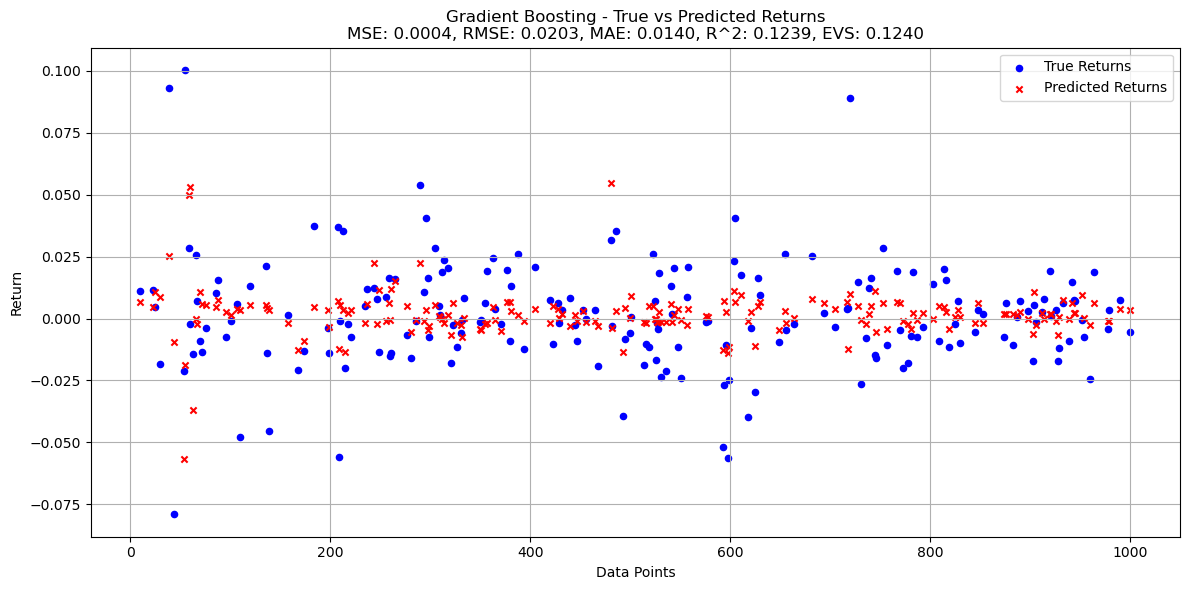

In [22]:
#Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train_scaled, y_train)
y_pred_gbr = gbr_model.predict(X_test_scaled)
gbr_mse, gbr_rmse, gbr_mae, gbr_r2, gbr_evs = evaluate_model(y_test, y_pred_gbr)
print(f'Gradient Boosting - MSE: {gbr_mse:.4f}, RMSE: {gbr_rmse:.4f}, MAE: {gbr_mae:.4f}, R^2: {gbr_r2:.4f}, EVS: {gbr_evs:.4f}')
plot_results('Gradient Boosting', y_test, y_pred_gbr, 'Gradient Boosting', gbr_mse, gbr_rmse, gbr_mae, gbr_r2, gbr_evs)

#### XGBoost Regressor

XGBoost (Extreme Gradient Boosting) is an optimized version of gradient boosting that is designed to be highly efficient and scalable. It incorporates additional techniques such as regularization to prevent overfitting and improve performance. The model is evaluated using MSE, RMSE, MAE, R², and EVS. Visualization of the results helps to compare the XGBoost model's predictions with the actual stock returns.



XGBoost - MSE: 0.0004, RMSE: 0.0191, MAE: 0.0120, R^2: 0.2233, EVS: 0.2234


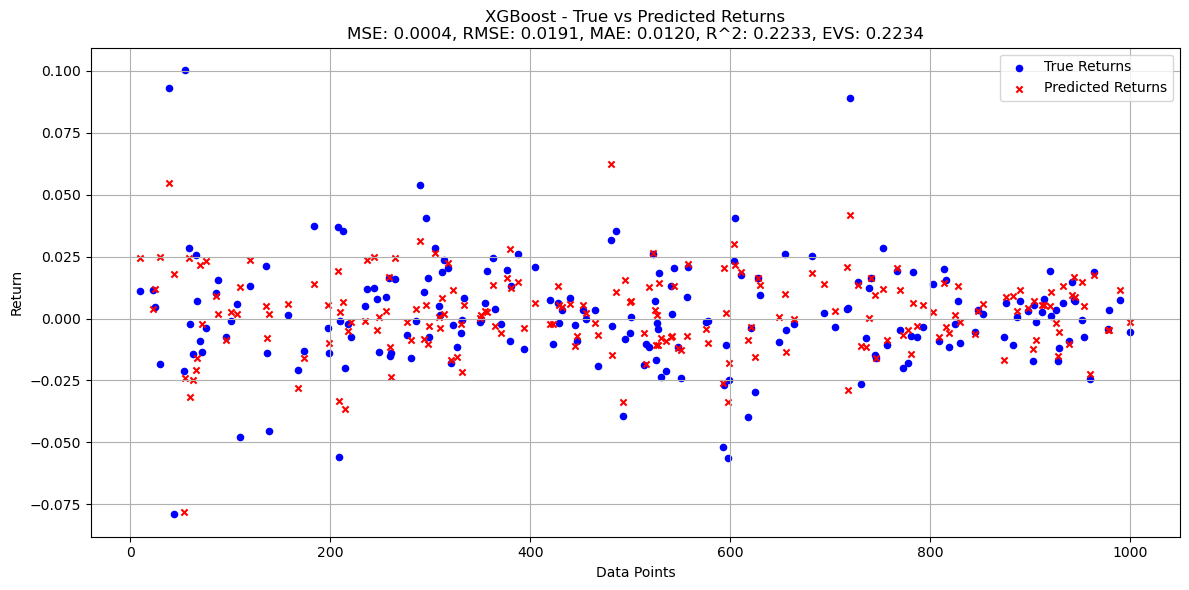

In [23]:
#XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_mse, xgb_rmse, xgb_mae, xgb_r2, xgb_evs = evaluate_model(y_test, y_pred_xgb)
print(f'XGBoost - MSE: {xgb_mse:.4f}, RMSE: {xgb_rmse:.4f}, MAE: {xgb_mae:.4f}, R^2: {xgb_r2:.4f}, EVS: {xgb_evs:.4f}')
plot_results('XGBoost', y_test, y_pred_xgb, 'XGBoost', xgb_mse, xgb_rmse, xgb_mae, xgb_r2, xgb_evs)

---

### Deep Learning Models

In this section, we apply deep learning techniques to predict stock returns using LSTM and CNN models. Each model is trained on scaled data and evaluated based on performance metrics.

#### LSTM Model

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) designed to handle sequential data and capture long-term dependencies. They are particularly useful for time series forecasting. 

- **Model Architecture**: The LSTM model consists of two LSTM layers with 50 units each, followed by a dense layer with a single unit for the output.
- **Training**: The model is trained with 250 epochs and a batch size of 32. Validation is performed on a separate test set.
- **Evaluation**: Performance is measured using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared (R²), and Explained Variance Score (EVS). Results are visualized to compare the true and predicted returns.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
LSTM - MSE: 0.0002, RMSE: 0.0135, MAE: 0.0089, R^2: 0.6139, EVS: 0.6267


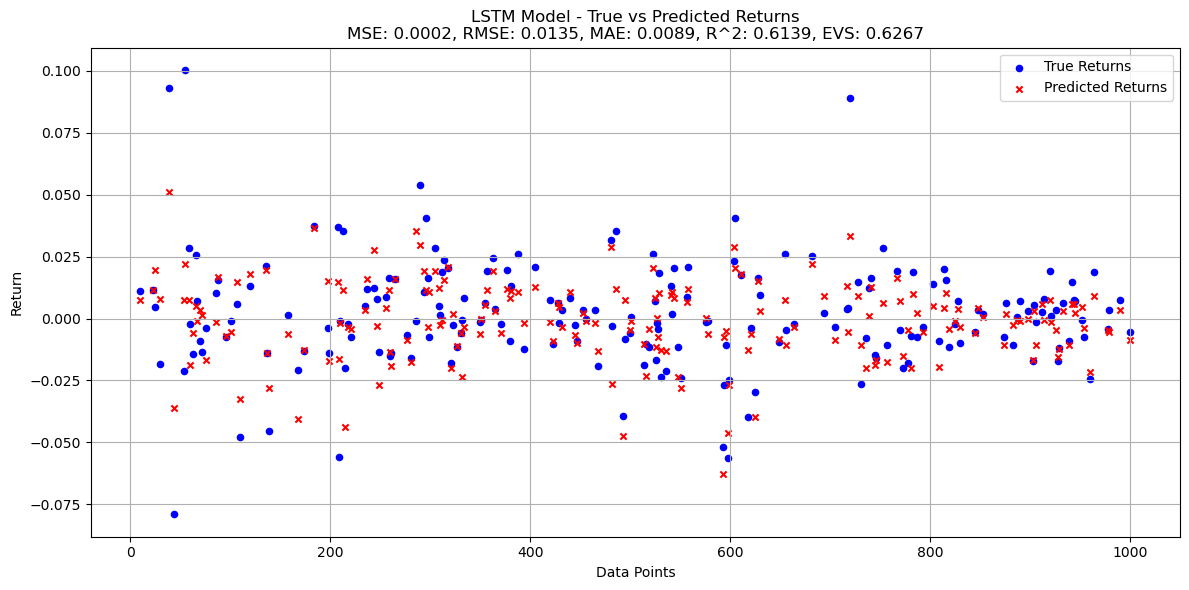

In [24]:
######## DEEP LEARNING MODELS ########
# LSTM Model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=input_shape),
        LSTM(units=50),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
lstm_model = create_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]))
lstm_model.fit(X_train_lstm, y_train, epochs=250, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=0)
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
lstm_mse, lstm_rmse, lstm_mae, lstm_r2, lstm_evs = evaluate_model(y_test, y_pred_lstm)
print(f'LSTM - MSE: {lstm_mse:.4f}, RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}, R^2: {lstm_r2:.4f}, EVS: {lstm_evs:.4f}')
plot_results('LSTM', y_test, y_pred_lstm, 'LSTM Model', lstm_mse, lstm_rmse, lstm_mae, lstm_r2, lstm_evs)

#### CNN Model

Convolutional Neural Networks (CNNs) are commonly used for image data but can also be effective for sequential data when applied correctly. They are designed to automatically and adaptively learn spatial hierarchies.

- **Model Architecture**: The CNN model includes a 1D convolutional layer with 64 filters and a kernel size of 3, followed by a max pooling layer with pool size 2, and a flatten layer before the final dense output layer.
- **Training**: The model is trained with 1000 epochs and a batch size of 32. Validation is done on a separate test set.
- **Evaluation**: The performance is assessed using MSE, RMSE, MAE, R², and EVS. Results are visualized to show the model's prediction accuracy compared to the actual returns.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
CNN - MSE: 0.0002, RMSE: 0.0150, MAE: 0.0105, R^2: 0.5176, EVS: 0.5190


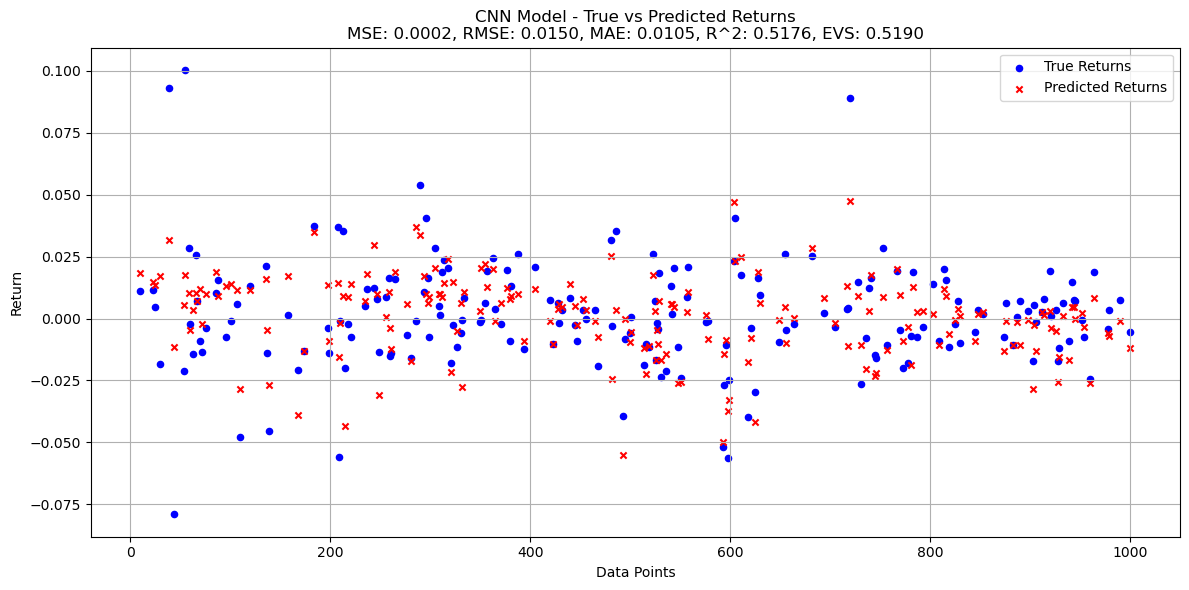

In [25]:
# CNN Model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(units=1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model
X_train_cnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
cnn_model = create_cnn_model((X_train_cnn.shape[1], X_train_cnn.shape[2]))
cnn_model.fit(X_train_cnn, y_train, epochs=1000, batch_size=32, validation_data=(X_test_cnn, y_test), verbose=0)
y_pred_cnn = cnn_model.predict(X_test_cnn).flatten()
cnn_mse, cnn_rmse, cnn_mae, cnn_r2, cnn_evs = evaluate_model(y_test, y_pred_cnn)
print(f'CNN - MSE: {cnn_mse:.4f}, RMSE: {cnn_rmse:.4f}, MAE: {cnn_mae:.4f}, R^2: {cnn_r2:.4f}, EVS: {cnn_evs:.4f}')
plot_results('CNN', y_test, y_pred_cnn, 'CNN Model', cnn_mse, cnn_rmse, cnn_mae, cnn_r2, cnn_evs)

---

### Hybrid Model

A hybrid model combines predictions from different machine learning models to improve overall performance. In this case, we create a hybrid model by combining the predictions from `Linear Regression` and `XGBoost` models.

#### Hybrid Model Approach

- **Model Combination**: The hybrid model's prediction is obtained by combining the predictions from the `Linear Regression` and `XGBoost` models. This approach leverages the strengths of both models to potentially improve prediction accuracy.
- **Evaluation Metrics**: The performance of the hybrid model is evaluated using evaluation metrics discussed above. 



Hybrid Model (Linear Regression + XGBoost) - MSE: 0.0002, RMSE: 0.0155, MAE: 0.0095, R^2: 0.4854, EVS: 0.4855


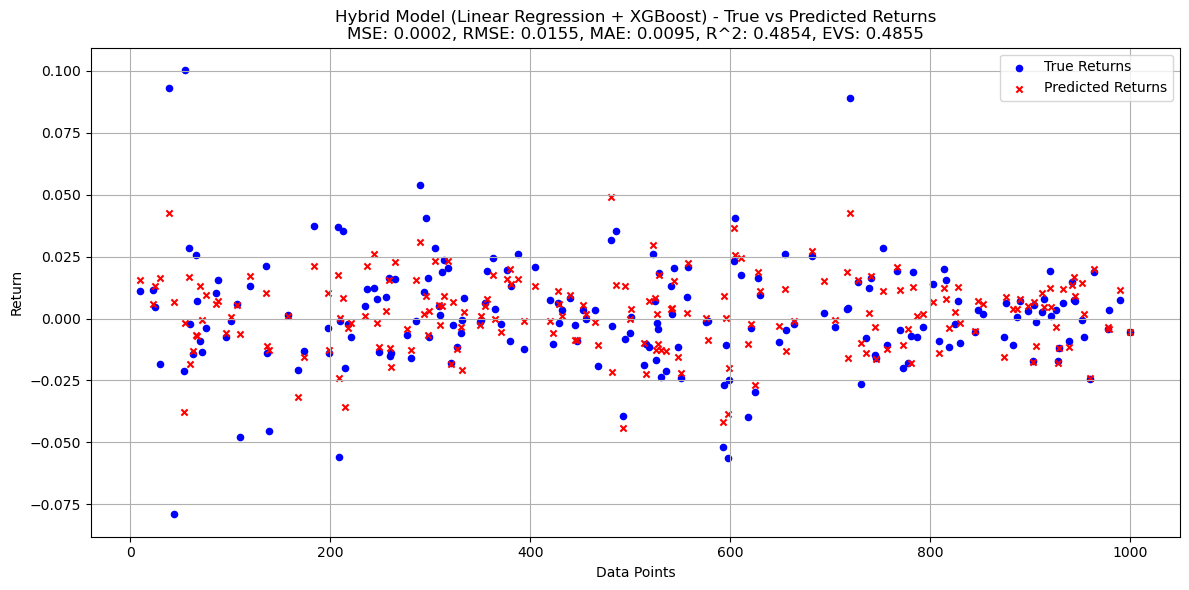

In [28]:
######## HYBRID MODEL ########
def evaluate_hybrid_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    return mse, rmse, mae, r2, evs

def plot_results_hybrid(model_name, y_true, y_pred, title):
    mse, rmse, mae, r2, evs = evaluate_hybrid_model(y_true, y_pred)
    plt.figure(figsize=(12, 6))
    plt.scatter(y_true.index, y_true, label='True Returns', color='blue', marker='o', s=20)
    plt.scatter(y_true.index, y_pred, label='Predicted Returns', color='red', marker='x', s=20)
    plt.title(f'{title} - True vs Predicted Returns\nMSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}, EVS: {evs:.4f}')
    plt.xlabel('Data Points')
    plt.ylabel('Return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

y_pred_hybrid = (y_pred_lr + y_pred_xgb) / 2.0
hybrid_mse, hybrid_rmse, hybrid_mae, hybrid_r2, hybrid_evs = evaluate_hybrid_model(y_test, y_pred_hybrid)
print(f'Hybrid Model (Linear Regression + XGBoost) - MSE: {hybrid_mse:.4f}, RMSE: {hybrid_rmse:.4f}, MAE: {hybrid_mae:.4f}, R^2: {hybrid_r2:.4f}, EVS: {hybrid_evs:.4f}')
plot_results_hybrid('Hybrid Model (Linear Regression + XGBoost)', y_test, y_pred_hybrid, 'Hybrid Model (Linear Regression + XGBoost)')

---

### Final Evaluation Summary

This section summarizes the performance of all the models evaluated in this analysis. The models include various traditional machine learning algorithms as well as advanced deep learning techniques. Each model's effectiveness is reviewed based on their ability to predict stock returns.

In [34]:
# Final Evaluation Summary
print("\nFinal Model Evaluation Summary:")

# Linear Regression
print(f"\nLinear Regression:")
print(f"MSE: {lr_mse:.4f}, RMSE: {lr_rmse:.4f}, MAE: {lr_mae:.4f}, R^2: {lr_r2:.4f}, EVS: {lr_evs:.4f}")

# Decision Tree
print(f"\nDecision Tree:")
print(f"MSE: {dt_mse:.4f}, RMSE: {dt_rmse:.4f}, MAE: {dt_mae:.4f}, R^2: {dt_r2:.4f}, EVS: {dt_evs:.4f}")

# Random Forest
print(f"\nRandom Forest:")
print(f"MSE: {rf_mse:.4f}, RMSE: {rf_rmse:.4f}, MAE: {rf_mae:.4f}, R^2: {rf_r2:.4f}, EVS: {rf_evs:.4f}")

# SVR
print(f"\nSVR:")
print(f"MSE: {svr_mse:.4f}, RMSE: {svr_rmse:.4f}, MAE: {svr_mae:.4f}, R^2: {svr_r2:.4f}, EVS: {svr_evs:.4f}")

# Gradient Boosting
print(f"\nGradient Boosting:")
print(f"MSE: {gbr_mse:.4f}, RMSE: {gbr_rmse:.4f}, MAE: {gbr_mae:.4f}, R^2: {gbr_r2:.4f}, EVS: {gbr_evs:.4f}")

# XGBoost
print(f"\nXGBoost:")
print(f"MSE: {xgb_mse:.4f}, RMSE: {xgb_rmse:.4f}, MAE: {xgb_mae:.4f}, R^2: {xgb_r2:.4f}, EVS: {xgb_evs:.4f}")

# LSTM
print(f"\nLSTM:")
print(f"MSE: {lstm_mse:.4f}, RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}, R^2: {lstm_r2:.4f}, EVS: {lstm_evs:.4f}")

# CNN
print(f"\nCNN:")
print(f"MSE: {cnn_mse:.4f}, RMSE: {cnn_rmse:.4f}, MAE: {cnn_mae:.4f}, R^2: {cnn_r2:.4f}, EVS: {cnn_evs:.4f}")

# Hybrid Model (Linear Regression + XGBoost)
print(f"\nHybrid Model (Linear Regression + XGBoost):")
print(f"MSE: {hybrid_mse:.4f}, RMSE: {hybrid_rmse:.4f}, MAE: {hybrid_mae:.4f}, R^2: {hybrid_r2:.4f}, EVS: {hybrid_evs:.4f}")


Final Model Evaluation Summary:

Linear Regression:
MSE: 0.0002, RMSE: 0.0141, MAE: 0.0089, R^2: 0.5764, EVS: 0.5764

Decision Tree:
MSE: 0.0008, RMSE: 0.0292, MAE: 0.0190, R^2: -0.8109, EVS: -0.8014

Random Forest:
MSE: 0.0004, RMSE: 0.0197, MAE: 0.0129, R^2: 0.1735, EVS: 0.1740

SVR:
MSE: 0.0008, RMSE: 0.0274, MAE: 0.0210, R^2: -0.6015, EVS: -0.3423

Gradient Boosting:
MSE: 0.0004, RMSE: 0.0203, MAE: 0.0140, R^2: 0.1239, EVS: 0.1240

XGBoost:
MSE: 0.0004, RMSE: 0.0191, MAE: 0.0120, R^2: 0.2233, EVS: 0.2234

LSTM:
MSE: 0.0002, RMSE: 0.0135, MAE: 0.0089, R^2: 0.6139, EVS: 0.6267

CNN:
MSE: 0.0002, RMSE: 0.0150, MAE: 0.0105, R^2: 0.5176, EVS: 0.5190

Hybrid Model (Linear Regression + XGBoost):
MSE: 0.0002, RMSE: 0.0155, MAE: 0.0095, R^2: 0.4854, EVS: 0.4855


---

### Findings

#### Linear Regression
The Linear Regression model demonstrated effective performance, capturing a significant portion of the variance in stock returns and showing low error metrics. This indicates that despite its simplicity, the model was able to fit the data reasonably well and provide reliable predictions.

#### Decision Tree
The Decision Tree model performed poorly, as evidenced by a negative R² score and high error metrics. This suggests that the model was ineffective in capturing the underlying patterns in the stock data, possibly due to its sensitivity to noise and overfitting tendencies.

#### Random Forest
The Random Forest model, while able to fit the data, did not perform as well as expected. The low R² score and higher error metrics compared to Linear Regression indicate that it was less effective in predicting stock returns and explaining the variance.

#### Support Vector Regressor
The Support Vector Regressor showed poor performance with a negative R² score and high error metrics. This implies that the model struggled to capture the non-linear relationships in the stock data, leading to less accurate predictions.

#### Gradient Boosting Regressor
The Gradient Boosting Regressor exhibited limited effectiveness, with a low R² score and high error metrics. Despite its ability to handle complex relationships, the model did not perform well in this study, indicating that it might require further tuning to improve its predictive accuracy.

#### XGBoost
The XGBoost model demonstrated moderate performance, capturing a modest portion of the variance in stock returns. While its error metrics were relatively lower, indicating better accuracy compared to some other models, it still showed room for improvement.

#### Long Short-Term Memory (LSTM)
The LSTM model excelled in performance, with high R² and low error metrics, reflecting its ability to effectively capture temporal patterns in the data. However, it required extensive tuning and substantial computational resources to achieve these results.

#### Convolutional Neural Network (CNN)
The CNN model also performed well, with a relatively high R² score and low error metrics. This suggests that CNNs are effective at extracting features from time series data, though they also require careful tuning and can be complex to implement.

#### Hybrid Model (LR/XGB)
The Hybrid Model combining Linear Regression and XGBoost showed promising results, effectively leveraging the strengths of both models. It provided a good balance of predictive accuracy and variance explanation, highlighting the benefits of using hybrid approaches in financial forecasting.

---

### Conclusion

For effective stock prediction, researchers and analysts should consider the strengths and limitations of various machine learning models. Linear Regression is suitable for straightforward, linear relationships but struggles with non-linear patterns and high volatility. Decision Trees and Random Forests handle non-linearity and diverse data types well, with Random Forests reducing overfitting, though they offer moderate accuracy compared to advanced techniques. Support Vector Machines (SVMs) excel in capturing complex, non-linear relationships but are computationally intensive. Gradient Boosting Models like XGBoost provide high precision by iteratively improving weak models but require careful tuning and are slower to train. LSTM Networks are powerful for time-series data with strong temporal patterns but demand significant computational resources and complex tuning. CNNs are effective at feature extraction from large datasets and complex patterns but are also resource-intensive. Hybrid Models such as LR/XGB combine linear and non-linear approaches to leverage the strengths of both, offering robust predictions across varying market conditions. Model selection should be based on the specific market conditions, data complexity, and computational resources available.

---